<a href="https://colab.research.google.com/github/mpaulina24/Paulina/blob/main/Grosor_cortical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Semillero de Investigación NeuroCo
<h3><font color='black'>

María Paulina Arias Castillo
   
Daniel Barrera Mazo

Isabella Bedoya Orozco

<h3><font color='black'>
Noviembre 2024 </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>

Se carga el archivo csv donde se encuentras los datos clasificados de grosor cortical

In [5]:
# Librerias a usar en el desarrollo del proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import scipy.stats as st
from scipy.stats import kstest, norm, levene, ttest_ind, mannwhitneyu, shapiro, kruskal

In [6]:
# Directorio
print("Directorio actual:", os.getcwd())
print("Archivos en el directorio:", os.listdir())

Directorio actual: /content
Archivos en el directorio: ['.config', 'sample_data']


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
data = pd.read_excel('/content/drive/MyDrive/NeuroCo/Grosor_Organizado.xlsx', engine='openpyxl')

data

,Códificacion Vieja,Codificacion nueva,Estado,Escolaridad,Sexo,Edad,lh_caudalanteriorcingulate_thickness,lh_entorhinal_thickness,lh_isthmuscingulate_thickness,lh_medialorbitofrontal_thickness,...,BrainSegVolNotVent,rh_caudalanteriorcingulate_thickness,rh_entorhinal_thickness,rh_isthmuscingulate_thickness,rh_medialorbitofrontal_thickness,rh_middletemporal_thickness,rh_parahippocampal_thickness,rh_posteriorcingulate_thickness,rh_rostralanteriorcingulate_thickness,BrainSegVolNotVent.1
0,GK_003/,SAN_003,No portador,13.0,Femenino,29.0,2.518,3.614,2.567,2.534,...,1099934,2.386,3.934,2.579,2.442,2.637,3.280,2.631,2.687,1099934
1,GW_004/,SAN_004,Portador,11.0,Masculino,33.0,2.928,3.311,2.513,2.680,...,1220522,2.643,3.745,2.530,2.593,2.791,2.928,2.471,2.973,1220522
2,GK_005/,SAN_005,No portador,13.0,Femenino,27.0,3.053,3.262,2.567,2.546,...,1002342,2.458,3.547,2.626,2.466,2.594,3.152,2.688,2.928,1002342
3,GW_015/,SAN_015,Portador,14.0,Femenino,32.0,3.005,3.454,2.470,2.597,...,980033,2.829,3.602,2.336,2.621,2.773,3.159,2.639,3.091,980033
4,GK_022/,SAN_022,No portador,16.0,Femenino,33.0,2.630,3.485,2.478,2.417,...,1077675,2.668,3.130,2.599,2.420,2.942,2.784,2.696,2.594,1077675
5,GK_023/,SAN_023,No portador,16.0,NaN,27.0,2.564,3.375,2.487,2.385,...,1105484,2.714,2.568,2.838,2.366,2.795,2.740,2.922,3.059,1105484
6,GW_024/,SAN_024,Portador,13.0,Femenino,30.0,2.686,3.401,2.549,2.721,...,1107810,2.707,3.339,2.379,2.494,2.889,2.876,2.752,3.128,1107810
7,GW_032/,SAN_032,Portador,5.0,NaN,27.0,2.749,3.713,2.376,2.307,...,1010098,2.673,3.723,2.596,2.417,2.654,2.837,2.628,2.707,1010098
8,GW_034/,SAN_034,Portador,13.0,NaN,32.0,2.461,3.162,2.377,2.606,...,1004474,2.761,3.257,2.529,2.734,2.907,2.920,2.575,2.936,1004474
9,GK_043/,SAN_043,No portador,13.0,NaN,43.0,2.310,2.984,2.583,2.610,...,1226157,2.643,3.077,2.545,2.517,2.816,2.868,2.514,3.026,1226157


#Exploración de los datos

In [41]:
data.describe()

,Escolaridad,Edad,lh_caudalanteriorcingulate_thickness,lh_entorhinal_thickness,lh_isthmuscingulate_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_posteriorcingulate_thickness,lh_rostralanteriorcingulate_thickness,BrainSegVolNotVent,rh_caudalanteriorcingulate_thickness,rh_entorhinal_thickness,rh_isthmuscingulate_thickness,rh_medialorbitofrontal_thickness,rh_middletemporal_thickness,rh_parahippocampal_thickness,rh_posteriorcingulate_thickness,rh_rostralanteriorcingulate_thickness,BrainSegVolNotVent.1
count,34.000000,34.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,11.529412,35.558824,2.636395,3.275316,2.466500,2.527079,2.687763,2.954684,2.601263,2.809158,1.088335e+06,2.610421,3.334737,2.480368,2.548842,2.808316,2.817105,2.636684,2.898763,1.088335e+06
std,3.457406,5.934956,0.234519,0.303942,0.134149,0.125439,0.145930,0.285813,0.162686,0.217267,1.037998e+05,0.226556,0.287840,0.171177,0.147945,0.130474,0.210596,0.124309,0.236835,1.037998e+05
min,5.000000,26.000000,2.199000,2.252000,2.073000,2.236000,2.431000,2.318000,2.330000,2.096000,8.927010e+05,2.191000,2.568000,1.991000,2.184000,2.521000,2.387000,2.345000,2.245000,8.927010e+05
25%,11.000000,32.000000,2.474250,3.136000,2.422500,2.432750,2.575000,2.749250,2.491750,2.680000,1.013974e+06,2.450750,3.139000,2.371500,2.446250,2.719250,2.647250,2.557250,2.788500,1.013974e+06
50%,11.500000,34.500000,2.617000,3.315500,2.482500,2.526500,2.690500,2.942000,2.577500,2.816500,1.060178e+06,2.628500,3.329000,2.494500,2.537500,2.820000,2.805500,2.632000,2.932000,1.060178e+06
75%,13.750000,40.000000,2.753500,3.503000,2.542250,2.631750,2.775750,3.180000,2.700750,2.977000,1.144519e+06,2.716250,3.526250,2.591000,2.638000,2.905750,2.940750,2.699000,3.040750,1.144519e+06
max,17.000000,45.000000,3.087000,3.797000,2.837000,2.742000,3.046000,3.549000,2.940000,3.167000,1.310761e+06,3.081000,3.944000,2.838000,2.884000,3.059000,3.280000,2.922000,3.485000,1.310761e+06


# Análisis demográfico

### Edades por grupo

Las edades tienen desviación estandar baja, y el KDE evidencia una alta superposición de edades entre los estados, por lo que las poblaciones pueden ser comparables.

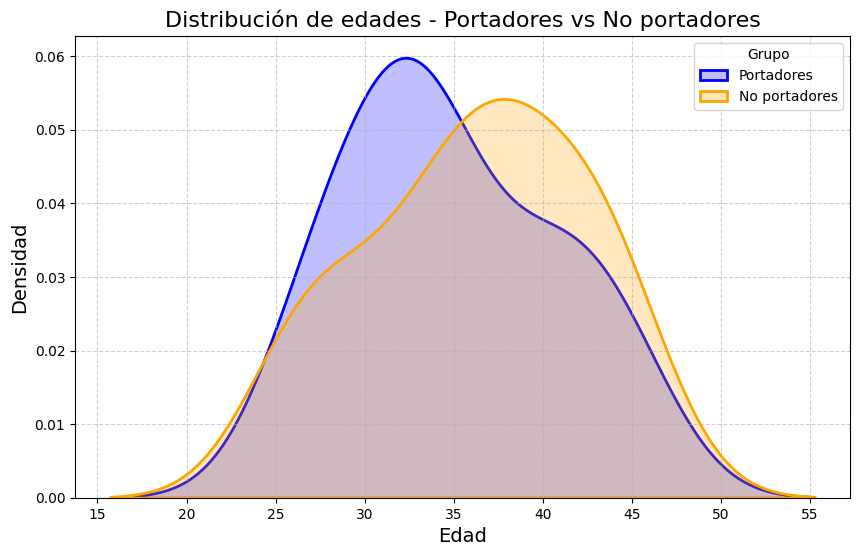

In [42]:
data = data.dropna(subset=['Edad', 'Estado']) #Filtrar datos

plt.figure(figsize=(10, 6))

# KDE para portadores
sns.kdeplot(
    data=data[data['Estado'] == 'Portador'],
    x='Edad',
    fill=True,
    label='Portadores',
    color='blue',
    linewidth=2
)

# KDE para no portadores
sns.kdeplot(
    data=data[data['Estado'] == 'No portador'],
    x='Edad',
    fill=True,
    label='No portadores',
    color='orange',
    linewidth=2
)

plt.title('Distribución de edades - Portadores vs No portadores', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend(title='Grupo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Cantidad de sujetos por estado

<ipython-input-65-cf62743d8eab>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


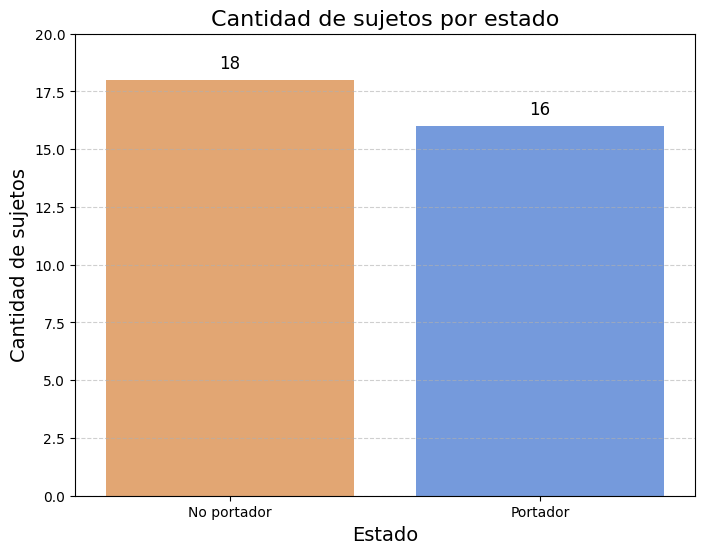

In [65]:
plt.style.use("default")

# Contar la cantidad de sujetos en cada grupo
conteo_grupos = data['Estado'].value_counts()

# Crear el gráfico de barras con los colores especificados
plt.figure(figsize=(8, 6))
sns.barplot(
    x=conteo_grupos.index,
    y=conteo_grupos.values,
    palette=[ "#F4A460","#6495ED"]  # Azul y naranja similares a los del gráfico de densidad
)

# Personalizar el gráfico
plt.title('Cantidad de sujetos por estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Cantidad de sujetos', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 20)

# Mostrar valores en las barras
for i, v in enumerate(conteo_grupos.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Mostrar el gráfico

## Mapa de calor de correlación (edad y regiones cerebrales)

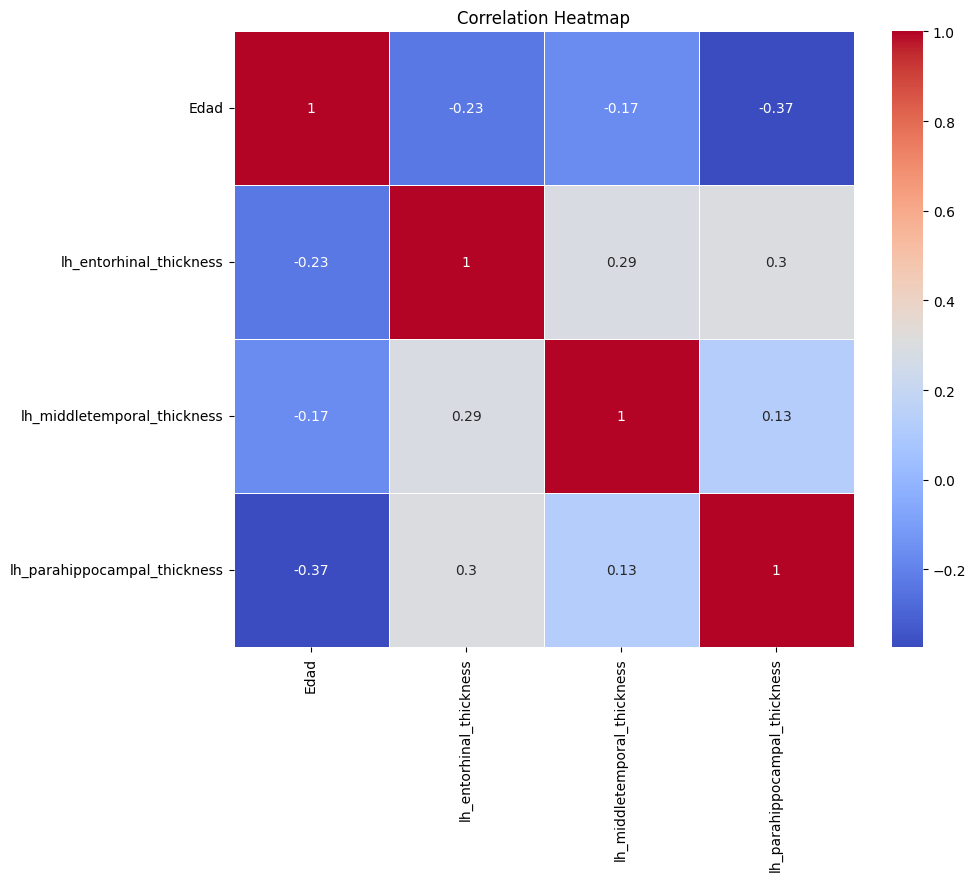

In [44]:
# Selecting columns relevant for correlation analysis
columns_to_analyze = [
    'Edad', 'lh_entorhinal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness'
]

# Calculate the correlation matrix
corr_matrix = data[columns_to_analyze].corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

El heatmap muestra cómo la edad se relaciona con el grosor cortical en tres áreas cerebrales que son de interés para el estudio. Se observa que, a medida que aumenta la edad, hay una correlación negativa moderada con el grosor de la corteza parahipocampal (-0.37), lo que sugiere que el envejecimiento se asocia con un adelgazamiento en esta región. Dado que esta área está implicada en la memoria y la navegación espacial, su reducción podría reflejar un deterioro relacionado con el envejecimiento. De manera similar, aunque en menor grado, la corteza entorrinal muestra una correlación negativa con la edad (-0.23), lo cual es relevante, ya que esta región es crucial para la memoria y suele verse afectada en etapas tempranas de enfermedades neurodegenerativas como el Alzheimer. La correlación más débil se encuentra en la corteza temporal media (-0.17), lo que sugiere que, aunque el grosor en esta área también disminuye con la edad, el impacto podría ser menos pronunciado en comparación con las otras dos regiones. En conjunto, estos resultados sugieren que el envejecimiento afecta de forma notable el grosor cortical en áreas relacionadas con la memoria y la cognición, subrayando su importancia como posibles marcadores para el estudio de procesos neurodegenerativos y el deterioro cognitivo relacionado con la edad.

# Gráfico de dispersión múltiple

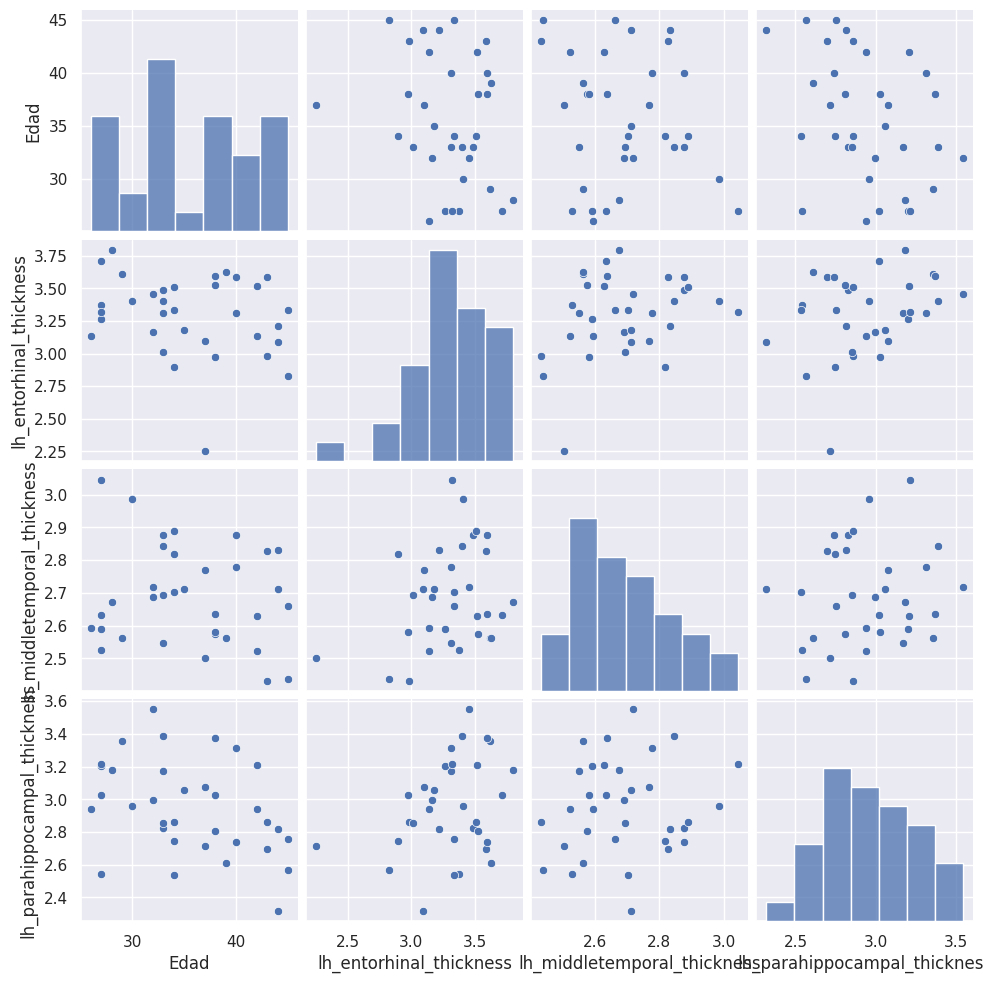

In [45]:
cols = ['Edad', 'lh_entorhinal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness']
##cols =  np.unique(list(df_train._get_numeric_data().columns))
sns.set()
sns.pairplot(data[cols])

En este gráfico de dispersión múltiple, que muestra la relación entre la edad y el grosor cortical en las áreas entorrinal, temporal media y parahipocampal, no se observan patrones claros o tendencias definidas que indiquen una correlación fuerte entre la edad y el grosor cortical en estas regiones. Los puntos de dispersión están ampliamente dispersos sin formar una estructura discernible, lo que sugiere que, en este conjunto de datos, la edad no parece estar asociada de manera consistente con cambios en el grosor cortical. Aunque en algunos estudios se ha documentado un adelgazamiento cortical con el envejecimiento, aquí los datos muestran una gran variabilidad interindividual sin que se destaque una relación clara. Además, los histogramas reflejan una distribución relativamente uniforme tanto para la edad como para los valores de grosor cortical, lo que refuerza la idea de que, en esta muestra, no se puede concluir que exista una asociación significativa entre estas variables. Esto indica que otros factores, más allá de la edad, podrían estar influyendo en las mediciones del grosor cortical.

#Estadística Descriptiva

In [46]:
# Filtrar los datos para el estado "Portador"
portadores = data[data['Estado'] == 'Portador'][['lh_caudalanteriorcingulate_thickness','lh_entorhinal_thickness','lh_isthmuscingulate_thickness', 'lh_medialorbitofrontal_thickness','lh_middletemporal_thickness', 'lh_parahippocampal_thickness','lh_posteriorcingulate_thickness','lh_rostralanteriorcingulate_thickness']]

# Filtrar los datos para el estado "No portador"
no_portadores = data[data['Estado'] == 'No portador'][['lh_caudalanteriorcingulate_thickness','lh_entorhinal_thickness','lh_isthmuscingulate_thickness', 'lh_medialorbitofrontal_thickness','lh_middletemporal_thickness', 'lh_parahippocampal_thickness','lh_posteriorcingulate_thickness','lh_rostralanteriorcingulate_thickness']]


## Para 3 regiones

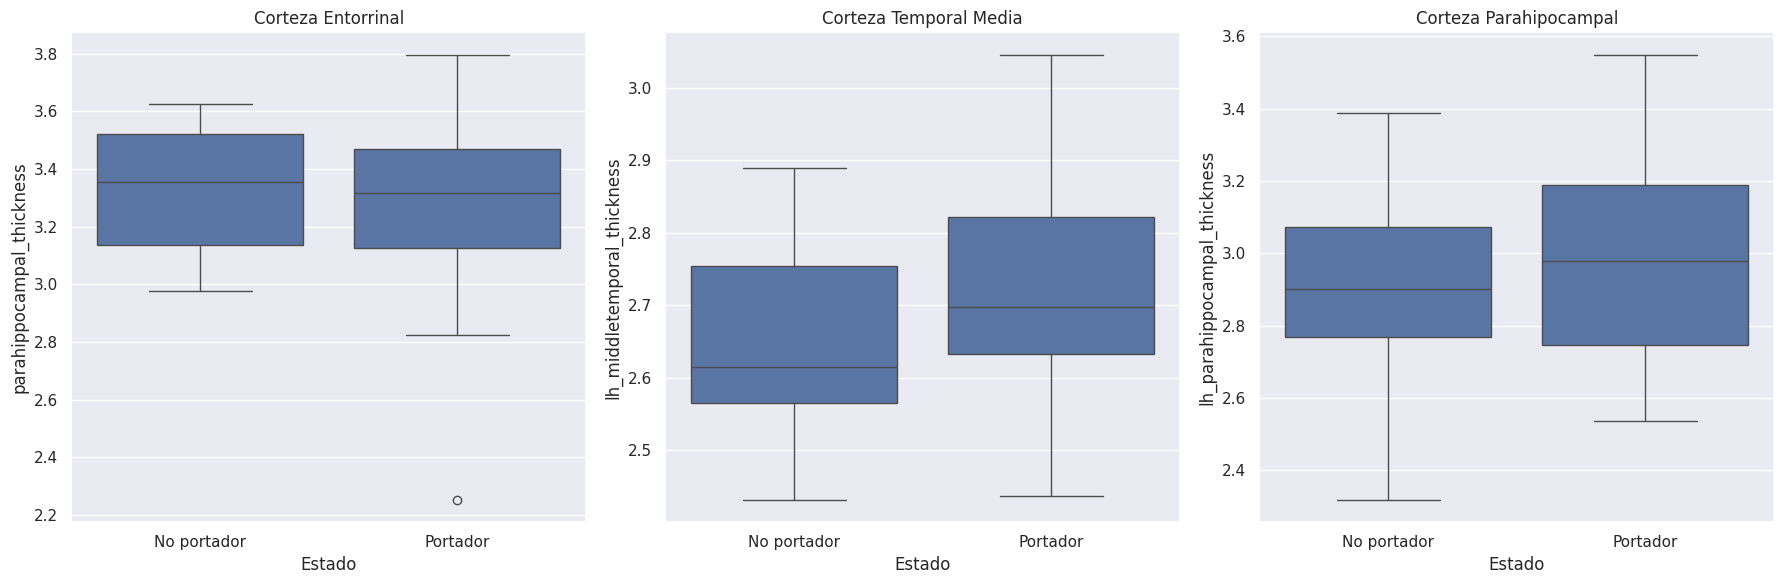

In [47]:
# Crear una figura con 3 subplots en una fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: lh_entorhinal_thickness
df_boxplot1 = data[['Estado', 'lh_entorhinal_thickness']].dropna()
sns.boxplot(x='Estado', y='lh_entorhinal_thickness', data=df_boxplot1, ax=axes[0])
axes[0].set_title('Corteza Entorrinal')
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('parahippocampal_thickness')

# Gráfico 2: lh_middletemporal_thickness
df_boxplot2 = data[['Estado', 'lh_middletemporal_thickness']].dropna()
sns.boxplot(x='Estado', y='lh_middletemporal_thickness', data=df_boxplot2, ax=axes[1])
axes[1].set_title('Corteza Temporal Media')
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('lh_middletemporal_thickness')

# Gráfico 3: lh_parahippocampal_thickness
df_boxplot3 = data[['Estado', 'lh_parahippocampal_thickness']].dropna()
sns.boxplot(x='Estado', y='lh_parahippocampal_thickness', data=df_boxplot3, ax=axes[2])
axes[2].set_title('Corteza Parahipocampal')
axes[2].set_xlabel('Estado')
axes[2].set_ylabel('lh_parahippocampal_thickness')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Al observar los boxplots que comparan el grosor cortical en tres regiones (entorinal, temporal media y parahipocampal) entre los grupos de portadores y no portadores, no se identifican diferencias claras y consistentes en los valores centrales o en la dispersión de los datos entre ambos grupos. En la corteza entorrinal, ambos grupos muestran distribuciones similares, con medianas prácticamente idénticas y rangos intercuartílicos que se superponen. En la corteza temporal media, aunque el grupo de no portadores parece presentar una mayor variabilidad, la diferencia en las medianas es mínima, lo que sugiere que el estado de portador no influye significativamente en el grosor en esta región. Por último, en la corteza parahipocampal, la distribución es nuevamente bastante similar entre ambos grupos, con una ligera tendencia a un grosor ligeramente mayor en los portadores, aunque la superposición de los rangos sugiere que esta diferencia podría no ser estadísticamente significativa. En general, estos resultados no parecen indicar una relación fuerte entre el estado de portador y el grosor cortical en las regiones analizadas, lo que sugiere que el estado de portador podría no ser un factor determinante para estas mediciones en la muestra estudiada.

#Estadística inferencial

Prueba de Shapiro-Wilk

**Hipótesis:**

p > alpha

*   H0: Los datos siguen una distribución normal (No se puede rechazar H0)
*  H1: Los datos no siguen una distribución normal (Se rechaza H0)





Prueba de Levene

**Hipótesis:**

*   H0: Los grupos tienen varianzas iguales (No se puede rechazar H0)

*   H1: Los grupos tienen varianzas diferentes (Se rechaza H0)
Independencia



In [48]:
grupos = ['No portador', 'Portador']

# Definir las columnas que te interesa probar
columnas_a_probar = [
    'lh_entorhinal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness'
]

# 1. Prueba de normalidad usando el test de Shapiro-Wilk
for columna in columnas_a_probar:
    print(f"\nResultados de la prueba de normalidad para {columna} por grupo:")
    for grupo in grupos:
        # Filtrar los datos para el grupo y la columna, eliminando NaN
        datos_filtrados = data[data['Estado'] == grupo][columna].dropna()

        # Asegúrate de que 'datos_filtrados' sea un array de números
        if not datos_filtrados.empty and datos_filtrados.dtype != 'object' and len(datos_filtrados) > 3:
            try:
                estadistico, p_value = st.shapiro(datos_filtrados)
                print(f"{grupo}: Estadístico W = {estadistico:.4f}, valor p = {p_value:.4f}")
                if p_value < 0.05:
                    print(f"  -> La variable '{columna}' en el grupo '{grupo}' NO sigue una distribución normal (se rechaza H0).")
                else:
                    print(f"  -> La variable '{columna}' en el grupo '{grupo}' sigue una distribución normal (no se rechaza H0).")
            except Exception as e:
                print(f"Error al realizar la prueba para {columna} en el grupo {grupo}: {e}")
        else:
            print(f"  -> No hay suficientes datos válidos en el grupo '{grupo}' para la prueba de Shapiro-Wilk.")




Resultados de la prueba de normalidad para lh_entorhinal_thickness por grupo:
No portador: Estadístico W = 0.9161, valor p = 0.1102
  -> La variable 'lh_entorhinal_thickness' en el grupo 'No portador' sigue una distribución normal (no se rechaza H0).
Portador: Estadístico W = 0.9224, valor p = 0.1845
  -> La variable 'lh_entorhinal_thickness' en el grupo 'Portador' sigue una distribución normal (no se rechaza H0).

Resultados de la prueba de normalidad para lh_middletemporal_thickness por grupo:
No portador: Estadístico W = 0.9333, valor p = 0.2214
  -> La variable 'lh_middletemporal_thickness' en el grupo 'No portador' sigue una distribución normal (no se rechaza H0).
Portador: Estadístico W = 0.9776, valor p = 0.9416
  -> La variable 'lh_middletemporal_thickness' en el grupo 'Portador' sigue una distribución normal (no se rechaza H0).

Resultados de la prueba de normalidad para lh_parahippocampal_thickness por grupo:
No portador: Estadístico W = 0.9700, valor p = 0.7980
  -> La vari

In [49]:
# Definir los grupos que te interesan
grupos = ['No portador', 'Portador']

# Definir las columnas que te interesa probar
columnas_a_probar = [
    'lh_entorhinal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness'
]

# Realizar la prueba de Levene para cada columna
for columna in columnas_a_probar:
    print(f"\nResultados de la prueba de Levene para {columna}:")

    # Filtrar los datos por grupo, eliminando NaN
    grupo1 = data[data['Estado'] == 'No portador'][columna].dropna()
    grupo2 = data[data['Estado'] == 'Portador'][columna].dropna()

    # Verificar que ambos grupos tengan suficientes datos
    if len(grupo1) > 3 and len(grupo2) > 3:
        # Realizar la prueba de Levene
        estadistico, p_value = st.levene(grupo1, grupo2)
        print(f"Estadístico Levene = {estadistico:.4f}, valor p = {p_value:.4f}")

        if p_value < 0.05:
            print(f"  -> Las varianzas NO son iguales (se rechaza H0).")
        else:
            print(f"  -> Las varianzas son iguales (no se rechaza H0).")
    else:
        print(f"  -> No hay suficientes datos en uno de los grupos para realizar la prueba de Levene.")



Resultados de la prueba de Levene para lh_entorhinal_thickness:
Estadístico Levene = 0.8155, valor p = 0.3732
  -> Las varianzas son iguales (no se rechaza H0).

Resultados de la prueba de Levene para lh_middletemporal_thickness:
Estadístico Levene = 0.1281, valor p = 0.7228
  -> Las varianzas son iguales (no se rechaza H0).

Resultados de la prueba de Levene para lh_parahippocampal_thickness:
Estadístico Levene = 0.0096, valor p = 0.9225
  -> Las varianzas son iguales (no se rechaza H0).


Dado que los datos presentan una distribución normal y cumplen con el criterio de homocedasticidad según la prueba de Levene, se procede a realizar pruebas paramétricas utilizando la prueba t de Student. Esto permite comparar las medias entre los grupos de forma adecuada, dado que se cumplen los supuestos necesarios para la aplicación de este análisis estadístico.

In [50]:
# Definir los grupos que te interesan
grupos = ['No portador', 'Portador']

# Definir las columnas que te interesa probar
columnas_a_probar = [
    'lh_entorhinal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness'
]

# Realizar la prueba t de Student para cada columna
for columna in columnas_a_probar:
    print(f"\nResultados de la prueba t de Student para {columna}:")

    # Filtrar los datos por grupo, eliminando NaN
    grupo1 = data[data['Estado'] == 'No portador'][columna].dropna()
    grupo2 = data[data['Estado'] == 'Portador'][columna].dropna()

    # Verificar que ambos grupos tengan suficientes datos
    if len(grupo1) > 3 and len(grupo2) > 3:
        # Realizar la prueba t de Student asumiendo varianzas iguales (porque cumplen con Levene)
        estadistico, p_value = st.ttest_ind(grupo1, grupo2, equal_var=True)
        print(f"Estadístico t = {estadistico:.4f}, valor p = {p_value:.4f}")

        # Interpretar los resultados
        if p_value < 0.05:
            print(f"  -> Existe una diferencia significativa en las medias entre los grupos (se rechaza H0).")
        else:
            print(f"  -> No existe una diferencia significativa en las medias entre los grupos (no se rechaza H0).")
    else:
        print(f"  -> No hay suficientes datos en uno de los grupos para realizar la prueba t de Student.")



Resultados de la prueba t de Student para lh_entorhinal_thickness:
Estadístico t = 0.6734, valor p = 0.5055
  -> No existe una diferencia significativa en las medias entre los grupos (no se rechaza H0).

Resultados de la prueba t de Student para lh_middletemporal_thickness:
Estadístico t = -1.2320, valor p = 0.2269
  -> No existe una diferencia significativa en las medias entre los grupos (no se rechaza H0).

Resultados de la prueba t de Student para lh_parahippocampal_thickness:
Estadístico t = -0.5062, valor p = 0.6162
  -> No existe una diferencia significativa en las medias entre los grupos (no se rechaza H0).


Los resultados de la prueba t de Student para las tres regiones evaluadas (corteza entorrinal, temporal media y parahipocampal) indican que no existen diferencias significativas en el grosor cortical entre los grupos de portadores y no portadores. Para la corteza entorrinal, el valor p de 0.7575 sugiere que las medias de grosor son muy similares entre los grupos, mientras que en la corteza temporal media (valor p = 0.1755) y la corteza parahipocampal (valor p = 0.8571) tampoco se observan diferencias estadísticamente significativas. Esto implica que, en este conjunto de datos, el estado de portador no parece influir en el grosor cortical de estas regiones, lo que sugiere que otros factores podrían ser más determinantes en la variabilidad observada en estas mediciones.

# Estadística descriptiva para todas las regiones

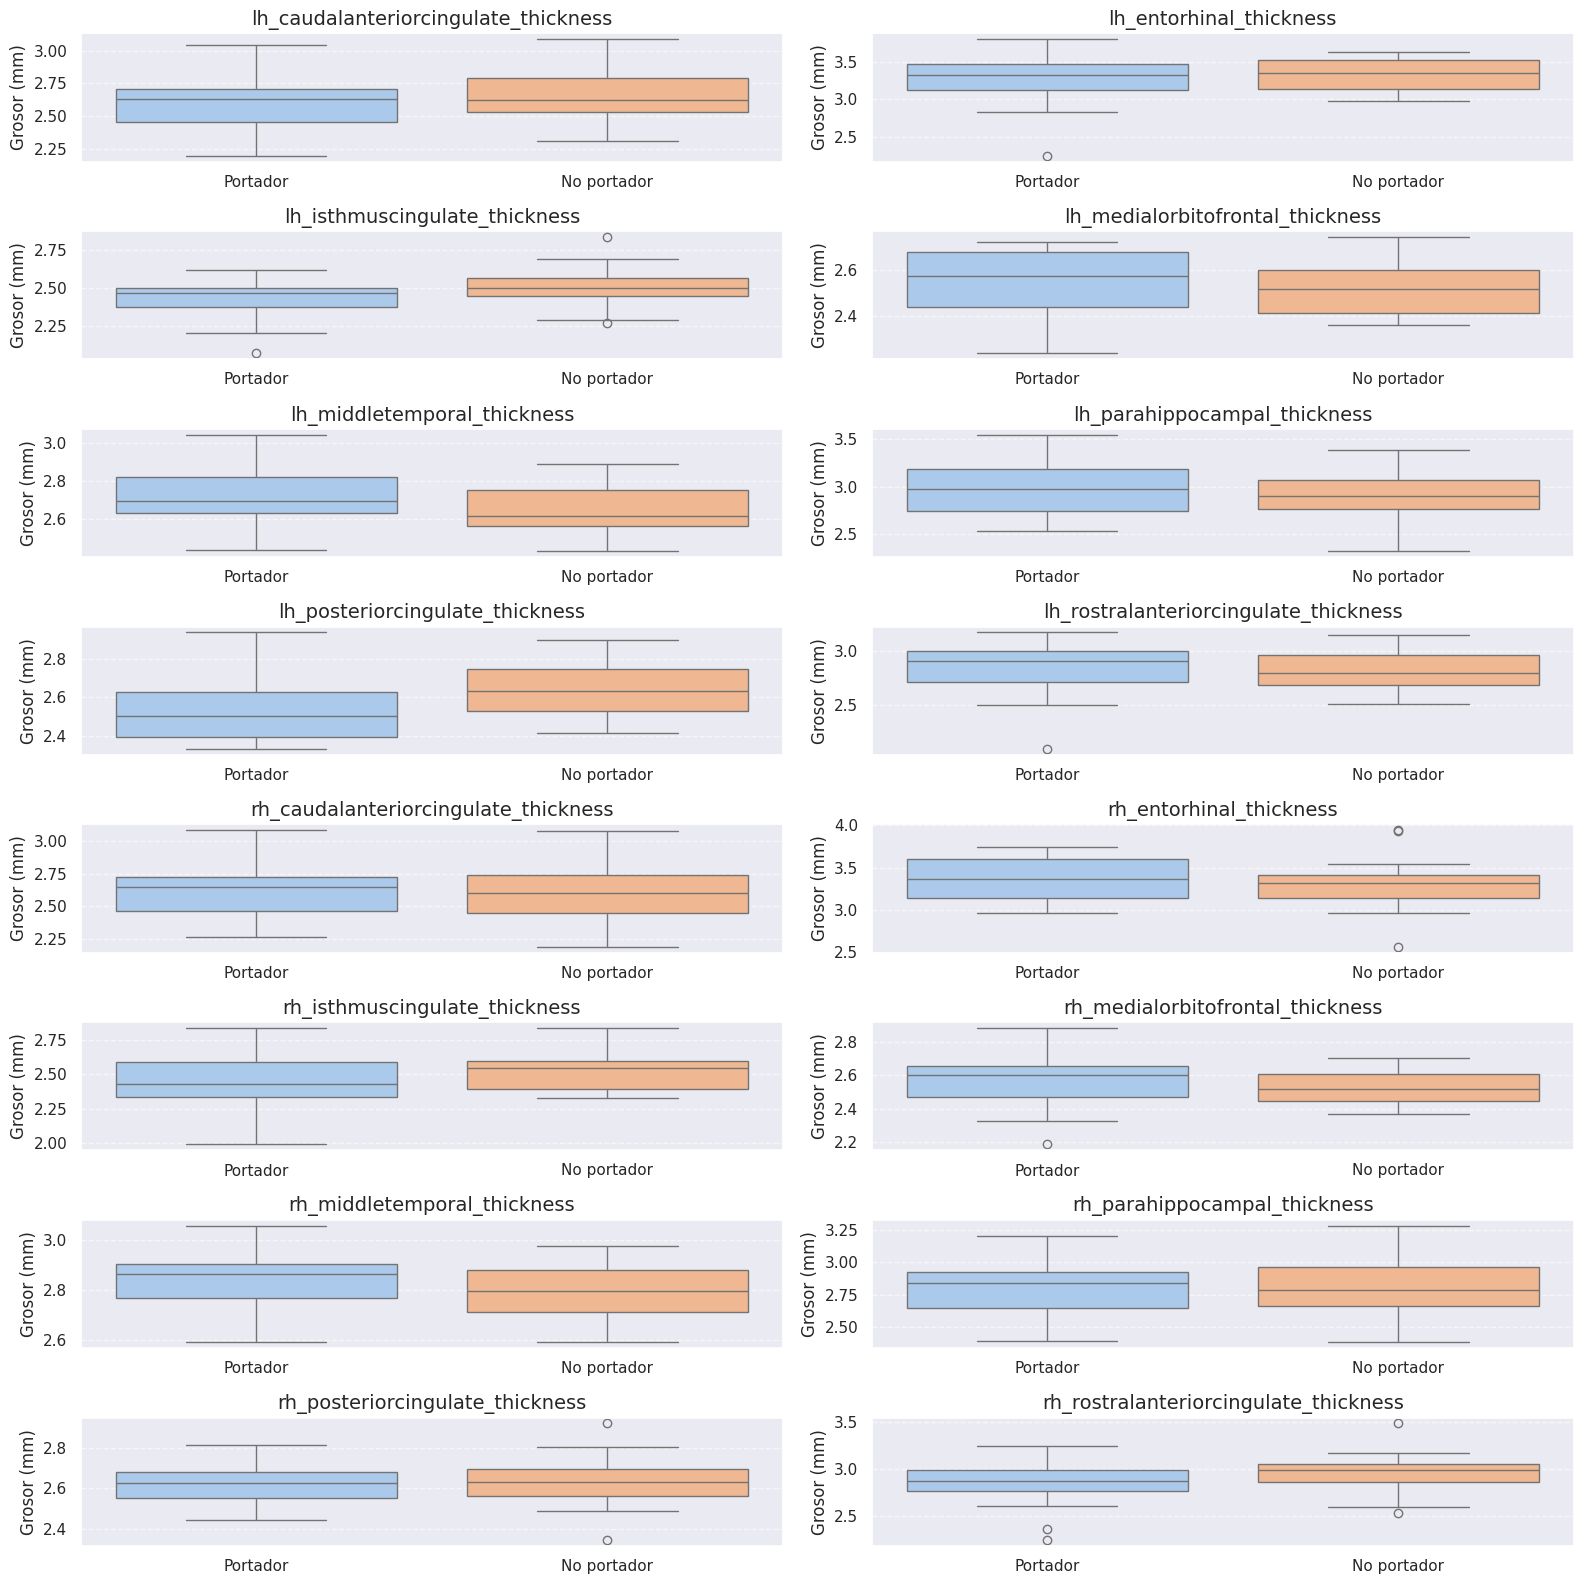

In [56]:
# Filtrar las columnas relevantes y agregar una columna de grupo (portadores/no portadores)
portadores = data[data['Estado'] == 'Portador'][[
    'lh_caudalanteriorcingulate_thickness', 'lh_entorhinal_thickness', 'lh_isthmuscingulate_thickness',
    'lh_medialorbitofrontal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness',
    'lh_posteriorcingulate_thickness', 'lh_rostralanteriorcingulate_thickness', 'rh_caudalanteriorcingulate_thickness', 'rh_entorhinal_thickness', 'rh_isthmuscingulate_thickness',
    'rh_medialorbitofrontal_thickness', 'rh_middletemporal_thickness', 'rh_parahippocampal_thickness',
    'rh_posteriorcingulate_thickness', 'rh_rostralanteriorcingulate_thickness'
]].assign(Grupo='Portador')

no_portadores = data[data['Estado'] == 'No portador'][[
    'lh_caudalanteriorcingulate_thickness', 'lh_entorhinal_thickness', 'lh_isthmuscingulate_thickness',
    'lh_medialorbitofrontal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness',
    'lh_posteriorcingulate_thickness', 'lh_rostralanteriorcingulate_thickness', 'rh_caudalanteriorcingulate_thickness', 'rh_entorhinal_thickness', 'rh_isthmuscingulate_thickness',
    'rh_medialorbitofrontal_thickness', 'rh_middletemporal_thickness', 'rh_parahippocampal_thickness',
    'rh_posteriorcingulate_thickness', 'rh_rostralanteriorcingulate_thickness'
]].assign(Grupo='No portador')

# Combinar ambas tablas
data_combinada = pd.concat([portadores, no_portadores])

# Convertir a formato largo para facilitar el graficado
data_larga = data_combinada.melt(id_vars='Grupo',
                                 var_name='Región',
                                 value_name='Espesor')

# Crear el layout de subgráficos (4 filas x 2 columnas)
fig, axes = plt.subplots(8, 2, figsize=(16, 16))
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Lista de regiones únicas
regiones = data_larga['Región'].unique()

# Graficar boxplots individuales por región
for i, region in enumerate(regiones):
    sns.boxplot(
        data=data_larga[data_larga['Región'] == region],
        x='Grupo',
        y='Espesor',
        hue='Grupo',
        palette='pastel',
        ax=axes[i]
    )
    axes[i].set_title(region, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Grosor (mm)', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Eliminar subgráficos vacíos (si hay menos de 8 regiones)
for j in range(len(regiones), len(axes)):
    fig.delaxes(axes[j])

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()

## Estadística inferencial para todas las regiones

In [54]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Crear listas para almacenar los resultados
resultados = []

# Lista de las columnas a comparar
regiones = [
    'lh_caudalanteriorcingulate_thickness', 'lh_entorhinal_thickness', 'lh_isthmuscingulate_thickness',
    'lh_medialorbitofrontal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness',
    'lh_posteriorcingulate_thickness', 'lh_rostralanteriorcingulate_thickness', 'rh_caudalanteriorcingulate_thickness', 'rh_entorhinal_thickness', 'rh_isthmuscingulate_thickness',
    'rh_medialorbitofrontal_thickness', 'rh_middletemporal_thickness', 'rh_parahippocampal_thickness',
    'rh_posteriorcingulate_thickness', 'rh_rostralanteriorcingulate_thickness'
]

# Iterar sobre cada región
for region in regiones:
    # Separar los datos de los portadores y no portadores
    portadores_data = portadores[region].dropna()
    no_portadores_data = no_portadores[region].dropna()

    # Prueba de normalidad de Shapiro
    stat_shapiro_portador, p_shapiro_portador = shapiro(portadores_data)
    stat_shapiro_no_portador, p_shapiro_no_portador = shapiro(no_portadores_data)
    normalidad = p_shapiro_portador > 0.05 and p_shapiro_no_portador > 0.05

    # Prueba de homocedasticidad de Levene
    stat_levene, p_levene = levene(portadores_data, no_portadores_data)
    homocedasticidad = p_levene > 0.05

    # Selección de prueba de hipótesis
    if normalidad and homocedasticidad:
        # Prueba t de Student
        stat, p_valor = ttest_ind(portadores_data, no_portadores_data)
        prueba = 't-test'
    else:
        # Prueba U de Mann-Whitney
        stat, p_valor = mannwhitneyu(portadores_data, no_portadores_data, alternative='two-sided')
        prueba = 'Mann-Whitney U'

    # Conclusiones
    conclusion = "Hay diferencia significativa" if p_valor < 0.05 else "No hay diferencia significativa"

    # Almacenar resultados
    resultados.append({
        'Región': region,
        'Prueba de Normalidad (Portador)': p_shapiro_portador,
        'Prueba de Normalidad (No portador)': p_shapiro_no_portador,
        'Normalidad': normalidad,
        'Prueba de Levene': p_levene,
        'Homocedasticidad': homocedasticidad,
        'Prueba': prueba,
        'Estadístico': stat,
        'p-valor': p_valor,
        'Conclusión': conclusion
    })

# Convertir los resultados a un DataFrame para visualizar
resultados_df = pd.DataFrame(resultados)
resultados_df

,Región,Prueba de Normalidad (Portador),Prueba de Normalidad (No portador),Normalidad,Prueba de Levene,Homocedasticidad,Prueba,Estadístico,p-valor,Conclusión
0,lh_caudalanteriorcingulate_thickness,0.791073,0.368928,True,0.841090,True,t-test,-0.609842,0.546273,No hay diferencia significativa
1,lh_entorhinal_thickness,0.184473,0.110245,True,0.373245,True,t-test,-0.673432,0.505507,No hay diferencia significativa
2,lh_isthmuscingulate_thickness,0.055161,0.312065,True,0.987703,True,t-test,-1.652322,0.108249,No hay diferencia significativa
3,lh_medialorbitofrontal_thickness,0.197632,0.365021,True,0.203010,True,t-test,0.559568,0.579670,No hay diferencia significativa
4,lh_middletemporal_thickness,0.941593,0.221444,True,0.722777,True,t-test,1.231965,0.226938,No hay diferencia significativa
5,lh_parahippocampal_thickness,0.802236,0.797975,True,0.922518,True,t-test,0.506227,0.616168,No hay diferencia significativa
6,lh_posteriorcingulate_thickness,0.151586,0.655705,True,0.873103,True,t-test,-1.784070,0.083898,No hay diferencia significativa
7,lh_rostralanteriorcingulate_thickness,0.061488,0.872103,True,0.286676,True,t-test,0.048686,0.961472,No hay diferencia significativa
8,rh_caudalanteriorcingulate_thickness,0.838725,0.919992,True,0.457789,True,t-test,0.276079,0.784263,No hay diferencia significativa
9,rh_entorhinal_thickness,0.198306,0.254833,True,0.835263,True,t-test,0.559828,0.579495,No hay diferencia significativa
